In [14]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy import stats
import matplotlib.pyplot as plt

In [15]:
# 1. Load Trial-Control Results
data_dir = Path("../data")
results_file = list(data_dir.glob("trial_vs_control_results_*.csv"))


if len(results_file) == 0:
  raise FileNotFoundError("No trial_vs_control_results_*.csv found. Run Notebook 3 first.")


results_df = pd.read_csv(results_file[0])
results_df.columns

Index(['trial_store', 'control_store', 'n_months_trial', 'mean_sales_trial',
       'mean_sales_control', 'ttest_t', 'ttest_p', 'perm_obs_diff', 'perm_p',
       'customers_diff', 'avgtx_diff'],
      dtype='object')

In [16]:
# 2. Summaries of Effect Sizes
results_df["sales_diff"] = results_df.mean_sales_trial - results_df.mean_sales_control


effect_summary = results_df[[
"trial_store","control_store","sales_diff","customers_diff","avgtx_diff"
]].copy()


effect_summary

,trial_store,control_store,sales_diff,customers_diff,avgtx_diff
0,77,167,75.10,3.666667,0.020333
1,86,159,886.00,101.333333,0.216000
2,88,159,1372.85,123.333333,0.243333


In [17]:
# 3. Hypothesis Test Interpretation
# Using:
# - ttest_p: p-value from classical t-test
# - perm_p: p-value from permutation test
def interpret_p(p):
  return "Significant" if p < 0.05 else "Not Significant"


results_df["ttest_result"] = results_df.ttest_p.apply(interpret_p)
results_df["perm_result"] = results_df.perm_p.apply(interpret_p)


results_df[[
"trial_store","control_store","ttest_p","ttest_result","perm_p","perm_result"
]]

,trial_store,control_store,ttest_p,ttest_result,perm_p,perm_result
0,77,167,0.024802,Significant,0.047391,Significant
1,86,159,0.002681,Significant,0.051590,Not Significant
2,88,159,0.000886,Significant,0.044991,Significant


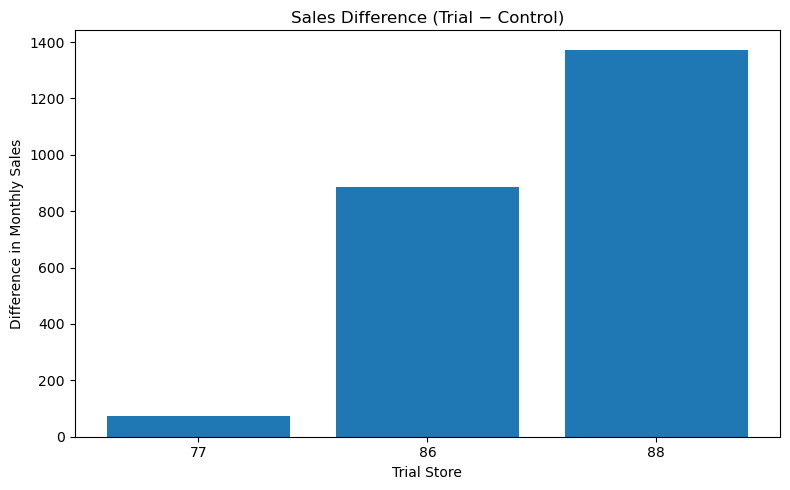

In [18]:
# 4. Visualization — Sales Difference
plt.figure(figsize=(8, 5))
plt.bar(results_df.trial_store.astype(str), results_df.sales_diff)
plt.title("Sales Difference (Trial − Control)")
plt.xlabel("Trial Store")
plt.ylabel("Difference in Monthly Sales")
plt.tight_layout()
plt.show()

In [19]:
# 5. Final Verdict for Each Trial Store
# Rules:
# A trial is considered successful if BOTH:
# - t-test is significant
# - permutation test is significant


results_df["final_verdict"] = np.where(
  (results_df.ttest_p < 0.05) & (results_df.perm_p < 0.05),
  "Trial Impact Confirmed",
  "No Strong Evidence"
)


final_results = results_df[[
  "trial_store","control_store","sales_diff","customers_diff","avgtx_diff",
  "ttest_p","perm_p","final_verdict"
]]


final_results

,trial_store,control_store,sales_diff,customers_diff,avgtx_diff,ttest_p,perm_p,final_verdict
0,77,167,75.10,3.666667,0.020333,0.024802,0.047391,Trial Impact Confirmed
1,86,159,886.00,101.333333,0.216000,0.002681,0.051590,No Strong Evidence
2,88,159,1372.85,123.333333,0.243333,0.000886,0.044991,Trial Impact Confirmed


In [20]:
# 6. Save Notebook Outputs
out_dir = Path("../data")
out_dir.mkdir(exist_ok=True)


final_results.to_csv(out_dir / "notebook4_final_results.csv", index=False)
effect_summary.to_csv(out_dir / "notebook4_effect_summary.csv", index=False)


print("outputs saved.")

outputs saved.
